In [1]:
#Multiple liner regression

#1. before applying th emultiple liner regresson we need to process the variable reduction technique.

#steps2: Correlation we have to do: 1. Person correlation, 2.point_Bi serial 3. Spersman rank correlation 

#step3: given data set : numerical , categarical->Gender(male, female & Others)

#Step4: Gender(Male, Female and others)-> method1: we have to create 3 variables like(Gender_male(1,0), Gender_Femal(1,0) & Gender_other(1,0))
#Method2: we have to create 2 level variables(Gender_male_Female(1,0) & Gender_others(1,0 ))


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
air = pd.read_csv(r"C:\Users\Balakrishna_Vema\Documents\Data science\Data sets\AirPassengers.csv")

In [7]:
air.head()

,Week_num,Passengers,Promotion_Budget,Service_Quality_Score,Holiday_week,Delayed_Cancelled_flight_ind,Inter_metro_flight_ratio,Bad_Weather_Ind,Technical_issues_ind
0,1,37824,517356,4.00000,NO,NO,0.70,YES,YES
1,2,43936,646086,2.67466,NO,YES,0.80,YES,YES
2,3,42896,638330,3.29473,NO,NO,0.90,NO,NO
3,4,35792,506492,3.85684,NO,NO,0.40,NO,NO
4,5,38624,609658,3.90757,NO,NO,0.87,NO,YES


In [8]:
air1=pd.get_dummies(air)

In [9]:
air1.head()

,Week_num,Passengers,Promotion_Budget,Service_Quality_Score,Inter_metro_flight_ratio,Holiday_week_NO,Holiday_week_YES,Delayed_Cancelled_flight_ind_NO,Delayed_Cancelled_flight_ind_YES,Bad_Weather_Ind_NO,Bad_Weather_Ind_YES,Technical_issues_ind_NO,Technical_issues_ind_YES
0,1,37824,517356,4.00000,0.70,1,0,1,0,0,1,0,1
1,2,43936,646086,2.67466,0.80,1,0,0,1,0,1,0,1
2,3,42896,638330,3.29473,0.90,1,0,1,0,1,0,1,0
3,4,35792,506492,3.85684,0.40,1,0,1,0,1,0,1,0
4,5,38624,609658,3.90757,0.87,1,0,1,0,1,0,0,1


In [10]:
air1=pd.get_dummies(air, drop_first=True, dtype="int")

In [11]:
air1.head()

,Week_num,Passengers,Promotion_Budget,Service_Quality_Score,Inter_metro_flight_ratio,Holiday_week_YES,Delayed_Cancelled_flight_ind_YES,Bad_Weather_Ind_YES,Technical_issues_ind_YES
0,1,37824,517356,4.00000,0.70,0,0,1,1
1,2,43936,646086,2.67466,0.80,0,1,1,1
2,3,42896,638330,3.29473,0.90,0,0,0,0
3,4,35792,506492,3.85684,0.40,0,0,0,0
4,5,38624,609658,3.90757,0.87,0,0,0,1


In [12]:
#Once Dummay Variables completed, we have to do Variable reduction techniques 
#correlation: 
              #1. Dependent variable must be normally distibuted(check 1.skew, 2.pplot/3.qqplot, histogram, Jbtest(n<5000), Shapiro(n>5000)
              #if not normally distributed do variable transfer tech(log, square, square root, inverse)
            #even we did variable tarnc but it's normall distributed, we have to go non-liner regression

#For multiple Regression
                 #1. No Multicolinarility 
                 #2.Dependnent variable must be normally distributed
                 #3. Residual errors must be normally distributed
                 #4. Homoscadacity
                #Note: before applying the correlation, is there data is normally distibuted or not

In [13]:
air["Passengers"].skew()

1.314495852821924

In [14]:
air1.corr()

,Week_num,Passengers,Promotion_Budget,Service_Quality_Score,Inter_metro_flight_ratio,Holiday_week_YES,Delayed_Cancelled_flight_ind_YES,Bad_Weather_Ind_YES,Technical_issues_ind_YES
Week_num,1.000000,0.412820,0.392003,-0.394892,0.188979,0.407681,0.053606,0.016239,-0.002168
Passengers,0.412820,1.000000,0.965851,-0.886530,0.491947,0.821298,0.116224,0.114404,-0.243588
Promotion_Budget,0.392003,0.965851,1.000000,-0.843382,0.531449,0.757834,0.127543,0.119175,-0.210171
Service_Quality_Score,-0.394892,-0.886530,-0.843382,1.000000,-0.443437,-0.824317,-0.048547,-0.052978,0.167894
Inter_metro_flight_ratio,0.188979,0.491947,0.531449,-0.443437,1.000000,0.320381,0.034553,0.068448,-0.008607
Holiday_week_YES,0.407681,0.821298,0.757834,-0.824317,0.320381,1.000000,0.015426,0.029374,-0.177933
Delayed_Cancelled_flight_ind_YES,0.053606,0.116224,0.127543,-0.048547,0.034553,0.015426,1.000000,0.875274,-0.174022
Bad_Weather_Ind_YES,0.016239,0.114404,0.119175,-0.052978,0.068448,0.029374,0.875274,1.000000,-0.150188
Technical_issues_ind_YES,-0.002168,-0.243588,-0.210171,0.167894,-0.008607,-0.177933,-0.174022,-0.150188,1.000000


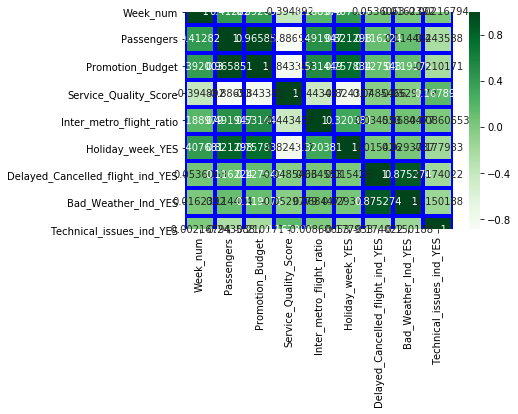

In [18]:
sns.heatmap(air1.corr(), linecolor="blue", linewidths=3, annot=True, fmt="5g", cmap="Greens")

In [20]:
abs(air1.corrwith(air1["Passengers"]))

Week_num                            0.412820
Passengers                          1.000000
Promotion_Budget                    0.965851
Service_Quality_Score               0.886530
Inter_metro_flight_ratio            0.491947
Holiday_week_YES                    0.821298
Delayed_Cancelled_flight_ind_YES    0.116224
Bad_Weather_Ind_YES                 0.114404
Technical_issues_ind_YES            0.243588
dtype: float64

In [26]:
air2=abs(air1.corrwith(air1["Passengers"]))<0.5  #Strong correlation validation 

In [27]:
air2[air2==False]  

Passengers               False
Promotion_Budget         False
Service_Quality_Score    False
Holiday_week_YES         False
dtype: bool